<a href="https://colab.research.google.com/github/sean-halpin/dublin_city_marathon/blob/main/dcm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests 

In [127]:
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option("display.precision", 1)

In [128]:
df = pd.DataFrame(columns=['Race Number',
'First Name',
'Surname',
'Gender',
'Gender Position',
'Category',
'Category Position',
'Club',
'10K',
'Stage Position',
'20K',
'Stage Position',
'HALFWAY',
'Stage Position',
'30K',
'Stage Position',
'40K',
'Stage Position',
'Gun Time',
'Overall Position',
'Chip Time',
'Chip Position',
'YouTube',
'Share'])

In [ ]:
for page in range(1,152):
  url = f"https://www.tdleventservices.co.uk/event-results/events?event=3849&page={page}"
  print(url)
  response= requests.get(url)
  soup = BeautifulSoup(response.content,"html.parser")
  table = soup.find('table', class_='table')

  for row in table.tbody.find_all('tr'):    
      columns = row.find_all('td')
      
      if(columns != []):
        cleaned_row=[]
        for c in columns:
          cleaned_col = c.text.strip()
          cleaned_row.append(cleaned_col)
        df.loc[len(df)] = cleaned_row

In [46]:
df.to_csv('dcm.csv', index = False)

In [132]:
df = pd.read_csv('dcm.csv')

In [133]:
pd.set_option('display.max_columns', None)

In [134]:
df.drop('Club', axis=1, inplace=True)
df.drop('YouTube', axis=1, inplace=True)
df.drop('Share', axis=1, inplace=True)

In [135]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Race Number        15100 non-null  int64 
 1   First Name         15100 non-null  object
 2   Surname            15099 non-null  object
 3   Gender             15100 non-null  object
 4   Gender Position    15100 non-null  object
 5   Category           15098 non-null  object
 6   Category Position  15100 non-null  object
 7   10K                14964 non-null  object
 8   Stage Position     15100 non-null  object
 9   20K                14965 non-null  object
 10  Stage Position.1   15100 non-null  object
 11  HALFWAY            14785 non-null  object
 12  Stage Position.2   15100 non-null  object
 13  30K                14786 non-null  object
 14  Stage Position.3   15100 non-null  object
 15  40K                14778 non-null  object
 16  Stage Position.4   15100 non-null  objec

In [136]:
df.head()

,Race Number,First Name,Surname,Gender,Gender Position,Category,Category Position,10K,Stage Position,20K,Stage Position.1,HALFWAY,Stage Position.2,30K,Stage Position.3,40K,Stage Position.4,Gun Time,Overall Position,Chip Time,Chip Position
0,2,Taoufik,Allam,Male,1,MS,1,00:32:16,5,01:03:35,4,01:07:03,4,01:34:21,2,02:04:43,1,02:11:30,1,02:11:30,1
1,5,Ashenafi,Boja,Male,2,MS,2,00:32:16,3,01:03:34,2,01:07:03,3,01:34:23,3,02:06:26,3,02:13:59,2,02:13:58,2
2,4,Birhanu,Teshome,Male,3,MS,3,00:32:15,1,01:03:33,1,01:07:01,2,01:34:19,1,02:06:25,2,02:14:26,3,02:14:25,3
3,7,Gelgelo,Outoya,Male,4,MS,4,00:32:16,4,01:03:34,3,01:07:08,5,01:36:19,4,02:09:10,4,02:16:03,4,02:16:02,4
4,21,Craig,Curley,Male,5,MS,5,00:33:19,14,01:06:21,14,01:10:17,14,01:39:29,7,02:11:46,5,02:18:50,5,02:18:49,5


In [137]:
print(df.shape)

(15100, 21)


In [138]:
df["Chip Time"].value_counts()['DNF']

256

In [139]:
df = df[df["Chip Time"] != 'DNF']

In [140]:
df.shape

(14844, 21)

In [141]:
df['Gender'] = df['Gender'].astype('category')
df['Gender Position']=df['Gender Position'].astype('int64')
df['Category'] = df['Category'].astype('category')
df['Category Position']=df['Category Position'].astype('int64')
df['10K']=pd.to_timedelta(df['10K'])
df['20K']=pd.to_timedelta(df['20K'])
df['HALFWAY']=pd.to_timedelta(df['HALFWAY'])
df['30K']=pd.to_timedelta(df['30K'])
df['40K']=pd.to_timedelta(df['40K'])
df['Gun Time']=pd.to_timedelta(df['Gun Time'])
df['Chip Time']=pd.to_timedelta(df['Chip Time'])
df['Stage Position']=df['Stage Position'].astype('int64')
df['Stage Position.1']=df['Stage Position.1'].astype('int64')
df['Stage Position.2']=df['Stage Position.2'].astype('int64')
df['Stage Position.3']=df['Stage Position.3'].astype('int64')
df['Stage Position.4']=df['Stage Position.4'].astype('int64')
df['Overall Position']=df['Overall Position'].astype('int64')
df['Chip Position']=df['Chip Position'].astype('int64')

In [142]:
df.head()

,Race Number,First Name,Surname,Gender,Gender Position,Category,Category Position,10K,Stage Position,20K,Stage Position.1,HALFWAY,Stage Position.2,30K,Stage Position.3,40K,Stage Position.4,Gun Time,Overall Position,Chip Time,Chip Position
0,2,Taoufik,Allam,Male,1,MS,1,0 days 00:32:16,5,0 days 01:03:35,4,0 days 01:07:03,4,0 days 01:34:21,2,0 days 02:04:43,1,0 days 02:11:30,1,0 days 02:11:30,1
1,5,Ashenafi,Boja,Male,2,MS,2,0 days 00:32:16,3,0 days 01:03:34,2,0 days 01:07:03,3,0 days 01:34:23,3,0 days 02:06:26,3,0 days 02:13:59,2,0 days 02:13:58,2
2,4,Birhanu,Teshome,Male,3,MS,3,0 days 00:32:15,1,0 days 01:03:33,1,0 days 01:07:01,2,0 days 01:34:19,1,0 days 02:06:25,2,0 days 02:14:26,3,0 days 02:14:25,3
3,7,Gelgelo,Outoya,Male,4,MS,4,0 days 00:32:16,4,0 days 01:03:34,3,0 days 01:07:08,5,0 days 01:36:19,4,0 days 02:09:10,4,0 days 02:16:03,4,0 days 02:16:02,4
4,21,Craig,Curley,Male,5,MS,5,0 days 00:33:19,14,0 days 01:06:21,14,0 days 01:10:17,14,0 days 01:39:29,7,0 days 02:11:46,5,0 days 02:18:50,5,0 days 02:18:49,5


In [143]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14844 entries, 0 to 14843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Race Number        14844 non-null  int64          
 1   First Name         14844 non-null  object         
 2   Surname            14843 non-null  object         
 3   Gender             14844 non-null  category       
 4   Gender Position    14844 non-null  int64          
 5   Category           14842 non-null  category       
 6   Category Position  14844 non-null  int64          
 7   10K                14726 non-null  timedelta64[ns]
 8   Stage Position     14844 non-null  int64          
 9   20K                14729 non-null  timedelta64[ns]
 10  Stage Position.1   14844 non-null  int64          
 11  HALFWAY            14576 non-null  timedelta64[ns]
 12  Stage Position.2   14844 non-null  int64          
 13  30K                14694 non-null  timedelta64

In [144]:
df["Gender"].value_counts()

Male      10025
Female     4819
Name: Gender, dtype: int64

In [145]:
df["Category"].value_counts()

M40    2252
M45    2073
MS     1522
M35    1504
M50    1421
F45    1105
F40    1067
M55     770
FS      756
F50     749
F35     570
F55     373
M60     305
F60     139
M65     117
M70      47
F65      40
F70      13
M75       9
F75       7
M80       3
Name: Category, dtype: int64

In [146]:
chip_time_by_category = df.groupby(['Category'])['Chip Time'].mean()

In [147]:
chip_time_by_category.sort_values()

Category
M40   0 days 03:58:21.433497536
M35   0 days 04:00:23.115436241
M45   0 days 04:03:27.178275694
MS    0 days 04:04:35.193783068
M50   0 days 04:15:10.526614620
M55   0 days 04:24:34.124835742
F35   0 days 04:29:36.177935943
F40   0 days 04:29:49.144212523
FS    0 days 04:29:58.130551816
F45   0 days 04:33:22.109074243
M60   0 days 04:40:47.516666666
F50   0 days 04:46:21.830163043
F55   0 days 05:00:11.498644986
M65   0 days 05:02:50.956896551
F60   0 days 05:15:36.110294117
M70   0 days 05:26:42.872340425
F65   0 days 05:34:24.447368421
F70   0 days 05:35:06.818181818
M75   0 days 05:51:34.333333333
M80   0 days 06:12:49.333333333
F75   0 days 06:22:12.166666666
Name: Chip Time, dtype: timedelta64[ns]

In [148]:
df.select_dtypes("timedelta64[ns]").describe()

,10K,20K,HALFWAY,30K,40K,Gun Time,Chip Time
count,14726,14729,14576,14694,14742,14844,14681
mean,0 days 00:56:55.629838381,0 days 01:53:49.869101772,0 days 02:00:34.723175082,0 days 02:56:18.334422213,0 days 04:02:54.970153303,0 days 04:19:23.455537590,0 days 04:17:21.679994550
std,0 days 00:10:12.629940189,0 days 00:21:09.199510551,0 days 00:22:36.133089599,0 days 00:34:52.696679276,0 days 00:48:30.875556760,0 days 00:52:47.342508162,0 days 00:51:53.920855565
min,0 days 00:32:15,0 days 01:03:33,0 days 01:04:27,0 days 01:34:19,0 days 02:04:43,0 days 02:11:30,0 days 02:11:30
25%,0 days 00:50:01.250000,0 days 01:39:23,0 days 01:45:04,0 days 02:32:17.250000,0 days 03:28:51,0 days 03:42:43.500000,0 days 03:41:11
50%,0 days 00:56:02,0 days 01:51:28,0 days 01:57:57,0 days 02:50:38,0 days 03:56:25.500000,0 days 04:12:24,0 days 04:10:37
75%,0 days 01:02:06,0 days 02:04:28,0 days 02:11:59,0 days 03:13:48.750000,0 days 04:29:42,0 days 04:47:58.250000,0 days 04:45:28
max,0 days 02:18:11,0 days 03:41:16,0 days 03:55:47,0 days 06:00:44,0 days 07:32:29,0 days 08:33:40,0 days 08:31:41


In [172]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

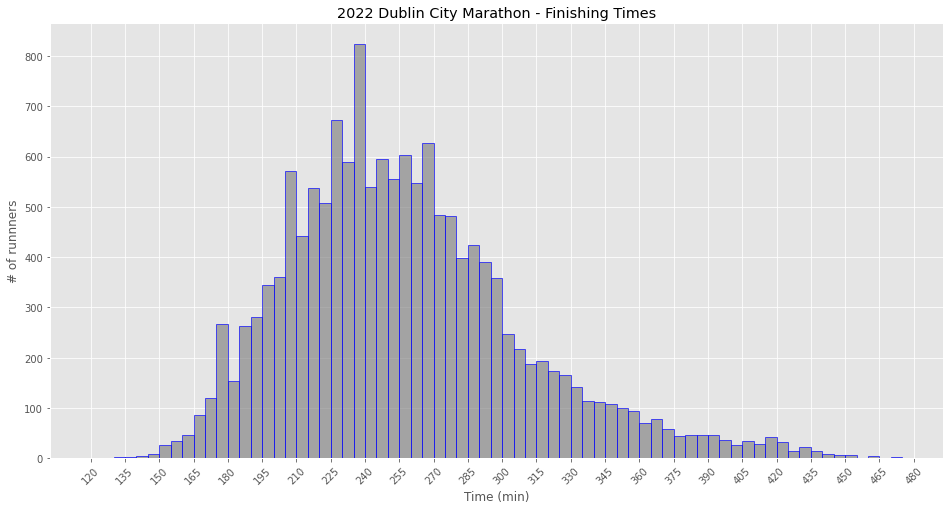

In [210]:
hist_data = df['Chip Time'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(16,8))
plt.xticks(range(120,600,15),rotation = 45)
plt.xlabel('Time (min)')
plt.ylabel('# of runnners')
plt.hist(hist_data, density=False, bins=range(120, 480, 5),
         color='grey', alpha=0.65, edgecolor='blue', linewidth=1)
plt.title('2022 Dublin City Marathon - Finishing Times')
plt.grid(True)
plt.show()